# Practice


## CNN classifier for the MNIST dataset

In [ ]:
#### PACKAGE IMPORTS ####


import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense,Flatten


![MNIST overview image](data/mnist.png)

#### The MNIST dataset

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

#### Load and preprocess the data

In [ ]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:
def scale_mnist_data(train_images, test_images):

    scaled_train_image=train_images/255
    scaled_test_images=test_images/255
    return scaled_train_image,scaled_test_images        

In [ ]:
# Run function on the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [ ]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model

In [ ]:
def get_model(input_shape):
    model=Sequential([
        Conv2D(8 ,(3,3) , padding='same',activation='relu', input_shape=input_shape),
        MaxPool2D((2,2)),
        Flatten(),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model    

In [ ]:
# Run  function to get the model

model = get_model(scaled_train_images[0].shape)

#### Compile the model



In [ ]:
def compile_model(model):
    model.compile(tf.keras.optimizers.Adam(), tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])
    return None     

In [ ]:
# Run function to compile the model

compile_model(model)

#### Fit the model to the training data



In [ ]:

def train_model(model, scaled_train_images, train_labels):
    history=model.fit(scaled_train_images,train_labels,epochs=5)
    return history   

In [ ]:
# Run  function to train the model

history = train_model(model, scaled_train_images, train_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2272 - accuracy: 0.9326
Epoch 2/5
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0811 - accuracy: 0.9756
Epoch 3/5
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.0546 - accuracy: 0.9828
Epoch 4/5
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.0416 - accuracy: 0.9868
Epoch 5/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0318 - accuracy: 0.9901


#### Plot the learning curves



In [ ]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

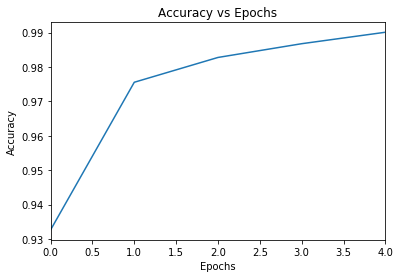

In [ ]:
# make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

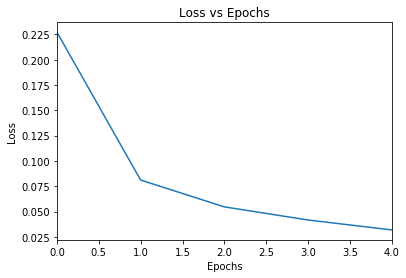

In [ ]:
# make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model


In [ ]:

def evaluate_model(model, scaled_test_images, test_labels):
  
    test_loss,test_accuracy=model.evaluate(scaled_test_images,test_labels,verbose=2)
    return (test_loss,test_accuracy)    
    

In [ ]:
# Run  function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/1 - 4s - loss: 0.0301 - accuracy: 0.9809
Test loss: 0.060094505001755893
Test accuracy: 0.98089998960495


#### Model predictions



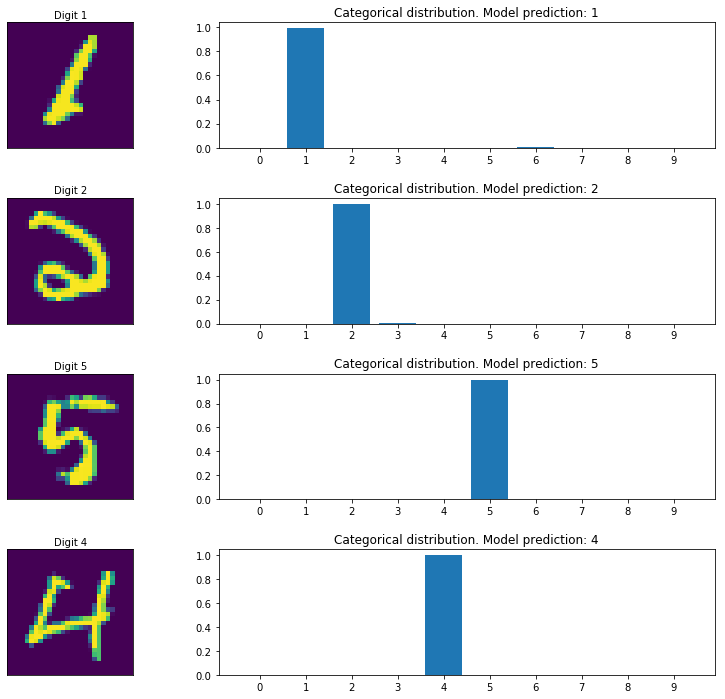

In [ ]:
# get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()